## Learning Pandas and Pylab

Pandas is the python's library that enables broad possibilities for the data analysis.
By means of the Pandas it is very easy to upload, manage and analyse data from different tables by means of SQL-like commands. Moreover, in connection with libraries Matplotlib and Seaborn, Pandas gives broad opportunities to visualise the data.

In [8]:
import pandas as pd
import numpy as np
%pylab inline

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


We study the main methods of packages Pandas and pylab by working with the dataset that describes the churn rate of the customers by one telecom company. 

<b>Exercise 1:</b>

Read the data from the file 'telecom_churn.csv' and display the first 5 rows by means of the method 'head'. <b> Hint :</b> method read_csv may be usefull

In [9]:
filename = 'telecom_churn.csv'
res = pd.read_csv(filename)
print res.head()

  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

<b>Exercise 2:</b>

Display the size of the data array, information about it, main statistical characteristics about it. <b>Hint:</b> use methods shape,info,describe.

In [10]:
print res.describe
print res.shape
print res.info

<bound method DataFrame.describe of      State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
5       AL             118        510                Yes              No   
6       MA             121        510                 No             Yes   
7       MO             147        415                Yes              No   
8       LA             117        408                 No              No   
9       WV             141        415                Yes             Yes   
10      IN              65        415                 No              No   
11      RI              74        415               

<b>Exercise 3:

</b>Convert column 'Churn' to the int64 type. <b> Hint:</b> use method astype.
Plot the distribution of the churn and  loyal clients in the bar plot. The figure should look like this:

<img src="dist_churn.png">

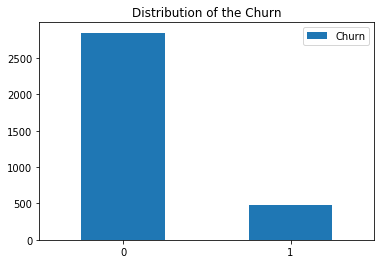

In [11]:
res.Churn = res['Churn'].astype('int64')
_max = res.Churn.count()
ammount_1 = res.Churn.sum()
ammount_0 = _max - ammount_1 

df = pd.DataFrame({'x':['0','1'], 'Churn':[ammount_0,ammount_1]})
ax = df.plot.bar(title="Distribution of the Churn",rot=0)


### Sorting

<b>Exercise 4:</b>

Sort the obtained dataframe by the value in 'Total day charge' in descending/ascending order. 
Sort the obtained dataframe by the the group of values in columns 'Churn' and 'Total eve calls'. Try different combinations of ordering. <b> Hint:</b> use the method sort_values.

In [12]:
sort1=res.sort_values('Total day charge',ascending=False) #sort descending
sort2=res.sort_values('Total day charge',ascending=True)  #sort ascending
print sort1
print sort2
grouped=res.groupby(['Total eve calls','Churn']).sum() 
print grouped


     State  Account length  Area code International plan Voice mail plan  \
365     CO             154        415                 No              No   
985     NY              64        415                Yes              No   
2594    OH             115        510                Yes              No   
156     OH              83        415                 No              No   
605     MO             112        415                 No              No   
975     DE             129        510                 No              No   
15      NY             161        415                 No              No   
1679    OK              82        510                 No              No   
2028    SD              93        510                 No              No   
197     TX             208        510                 No              No   
2412    WI              89        415                 No              No   
2824    OR              81        415                 No              No   
832     SC  

                       Account length  Area code  Number vmail messages  \
Total eve calls Churn                                                     
0               0                  97        415                      0   
12              0                   5        415                      0   
36              0                  74        408                      0   
37              0                 153        408                     28   
42              0                  74        510                      0   
43              0                 105        415                     21   
44              0                  86        408                      0   
45              0                  42        415                      0   
46              0                 420       1238                      0   
48              0                 475       1938                     25   
                1                 153        823                      0   
49              0        

### Indexing and extracting the information from the dataframe

By means of the Pandas dataframe we may index and extract information from the dataset. You can index the information, stored in dataframe either by column names or by row indexes. In the first case you use command <i>loc</i>, in the second <i> iloc </i>. <b> Hint: </b> Use logical indexation by column and method groupby to solve the tasks.

<b>Exercise 5:</b>
* Display the mean churn rate of the clients.
* Now we want to analyse statistical information only for the clients, which are not loyal/not loyal to their telecom-company (field 'churn' in dataframe). Extract separately the loyal and not loyal clients from the table and display the mean of their charateristics in one dataframe.
* How long do the not loyal users talk (on average) during the day?
* What is the maximal length of the international calls for the loyal users that do not use international plan ?

In [95]:
#mean churn rate:
res["Churn"].mean()

#not loyal clients
nlc=res.loc[res.Churn == 0]
print(nlc)
#mean data from the not loyal clients
meanNL=res.loc[res.Churn == 0].mean()
print(meanNL)

#loyal clients
lc=res.loc[res.Churn == 1]
#mean data from the loyal clients
meanL=res.loc[res.Churn == 1].mean()
print(meanL)


#average day talk time of not loyal users
total_day_nl = nlc.loc[:, ["Total day minutes", "Total eve minutes", "Total night minutes"]]
sum_talks_nl = total_day_nl.sum().sum()
avg_talks_nl = sum_talks_nl.mean()

#max length of international calls from loyal users not using international plan
lc_int=lc.loc[lc["International plan"] == "No"]
print(lc_int)
lc_int_calls = lc_int["Total intl calls"].max()
print("Max. length of international call from loyal users not using international plan: ")
print(lc_int_calls)

     State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
5       AL             118        510                Yes              No   
6       MA             121        510                 No             Yes   
7       MO             147        415                Yes              No   
8       LA             117        408                 No              No   
9       WV             141        415                Yes             Yes   
11      RI              74        415                 No              No   
12      IA             168        408                 No              No   
13      MT  

     State  Account length  Area code International plan Voice mail plan  \
10      IN              65        415                 No              No   
15      NY             161        415                 No              No   
21      CO              77        408                 No              No   
33      AZ              12        408                 No              No   
48      ID             119        415                 No              No   
54      WY              87        415                 No              No   
57      CO             121        408                 No             Yes   
69      TX             150        510                 No              No   
76      DC              82        415                 No              No   
77      NY             144        408                 No              No   
84      TX             106        510                 No              No   
86      IN              94        408                 No              No   
89      NJ  

### Distribution of the features

<b>Exercise 6:</b>

Plot the distribution of the features, which have numerical values. <b> Hint: </b>use the method hist which can be also applied for the pandas dataframe. It should look like that:
<img src="hist_feat.png">

What do you observe? From what probability distribution could each feature be generated from?

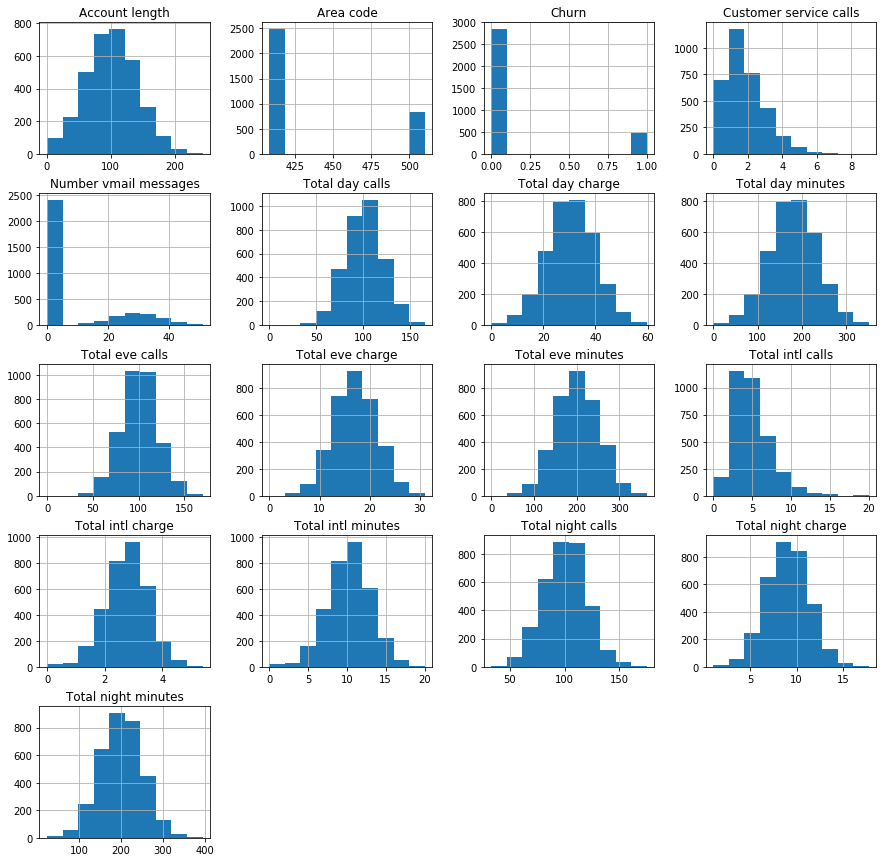

In [98]:
num = res.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32", "float64"]) #only numerical values
bx = num.hist(grid = True, figsize = (15,15))

### Pivot tables and graphics

We want to see how the instance are distributed between two categories: 'International plan' and 'Churn'. 

<b>Exercise 7:</b>
* Build the cross table between features using the method <i>crosstab</i>.
* Visualize the distribution for the feature 'Churn', depending on the value of the features 'International plan', 'Voice mail plan', and 'Customer service calls'.
<b>Hint:</b> Use commands plt.sublot and sns.subplots.

What do you see? What conclusions can be drawn? What feature (intuitively) can be more important for Churn prediction?

In [130]:
pd.crosstab(res["International plan"], res.Churn)


Churn,0,1
International plan,,
No,2664,346
Yes,186,137


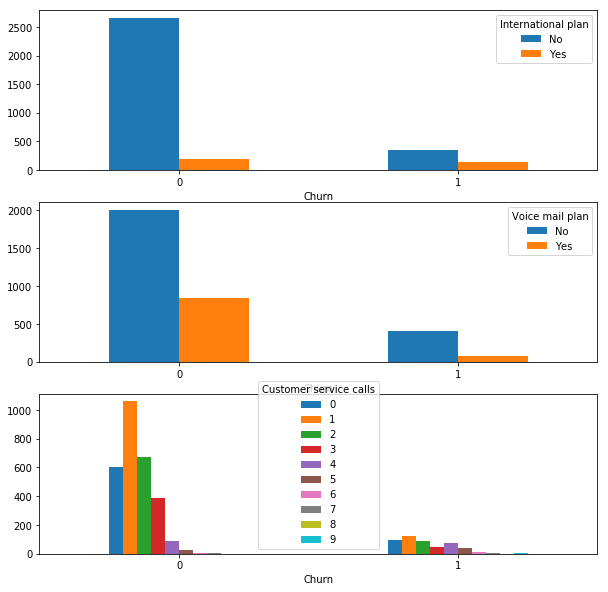

In [117]:
fig= plt.figure(figsize=(10,10)) #size of tables
ax1=plt.subplot(311)
pd.crosstab(res.Churn, res["International plan"]).plot.bar(rot=1,ax=ax1) #content of table 1
ax2=plt.subplot(312)
pd.crosstab(res.Churn, res["Voice mail plan"]).plot.bar(rot=1,ax=ax2) #content of table2 
ax3=plt.subplot(313)
pd.crosstab(res.Churn, res["Customer service calls"]).plot.bar(rot=1,ax=ax3) #content of table 3




<b>Exercise 8:</b>

Add to the dataframe a new feature which will describe whether or not the user have done more then 3 service calls. Investigate how does this feature describes the churn rate.

The churn rate of customers, who had less than 3 service calls is higher than the churn rate of customers, who did 3 or more service calls 


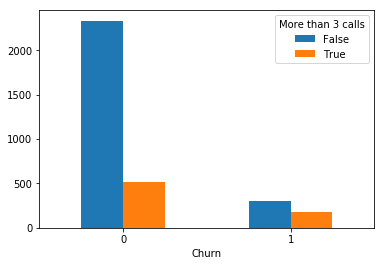

In [138]:
### Write Your code here ###
three_calls = res['Customer service calls']>=3
feature = res
feature['More than 3 calls'] = three_calls
cross_4 = pd.crosstab(feature['Churn'],feature['More than 3 calls'])
cross_4.plot.bar(rot=1)

print("The churn rate of customers, who had less than 3 service calls is higher than the churn rate of customers, who did 3 or more service calls ")

The churn rate of customers who had less than 3 service calls is higher than the churn rate of customers who did 3 or more service calls 
